(-4.0, 3.0)

findfont: Font family ['TimesNewRoman'] not found. Falling back to DejaVu Sans.


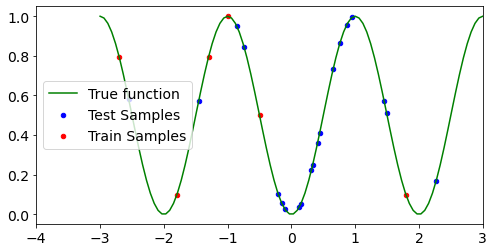

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
from matplotlib.lines import Line2D

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
params = {'legend.fontsize': 14,
         'axes.labelsize': 14,
         'axes.titlesize': 20,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
pylab.rcParams.update(params)

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.rm'] = 'serif'

plt.rcParams["font.family"] = "TimesNewRoman"

import pandas as pd
from sklearn import datasets
np.random.seed(0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression



def true_fn(X):
    f = np.sin(1/2 * np.pi * X)**2
    return f

def true_dfn(X):
    f = np.pi * np.sin(1/2 * np.pi * X) * np.cos(1/2 * np.pi * X)
    return f

def true_ddfn(X):
    f = - 1/2 * np.pi**2 * np.sin(1/2 * np.pi * X) * np.sin(1/2 * np.pi * X) + 1/2 * np.pi**2 * np.cos(1/2 * np.pi * X) * np.cos(1/2 * np.pi * X)
    return f

# Test samples
# n_train = 10


noise_level = 0.00
X_train = np.array([-2.7, -1.8, -1.3, -1, -.5, 1.8]) 
# X_train = np.sort(np.random.randn(100)) 
Y_train = true_fn(X_train) + np.random.randn(X_train.shape[0]) * noise_level

# Training samples
n_samples = 20

X_test = np.sort(np.random.randn(n_samples)) 
# X_test = np.array([-2.5, -1.5, -1, -.5, 1, 2]) 
Y_test = true_fn(X_test)

X_true = np.linspace(-3., 3., 100)

plt.plot(X_true,true_fn(X_true),'g',label = 'True function')
plt.scatter(X_test,Y_test, edgecolor='b', s=20, facecolor = 'b', label="Test Samples")
plt.scatter(X_train,Y_train, edgecolor='r', facecolor = 'r', s=20, label="Train Samples")
plt.legend()

plt.xlim((-4,3))

In [2]:
order_poly = 10

def fx_eval(theta):
    fx = np.zeros((X_train.shape[0]))
    for i in range(order_poly):
        fx += theta[i] * X_train**i
    return np.linalg.norm(fx - true_fn(X_train)) 
    
def dfx_eval(theta):
    dfx = np.zeros((X_train.shape[0]))
    for i in range(1, order_poly):
        dfx += theta[i] * (i) * X_train**(i-1)
    return np.linalg.norm(dfx - true_dfn(X_train)) 

def ddfx_eval(theta):
    ddfx = np.zeros((X_train.shape[0]))
    for i in range(2, order_poly):
        ddfx += theta[i] * (i) * (i-1) * X_train**(i-2)
    return np.linalg.norm(ddfx - true_ddfn(X_train)) 


In [3]:
from scipy.optimize import minimize

def f_total(theta):
    return fx_eval(theta)
def df_total(theta):
    return fx_eval(theta) + dfx_eval(theta)
def ddf_total(theta): 
    return 10 * fx_eval(theta) + dfx_eval(theta)  + ddfx_eval(theta)
    # return fx_eval(theta) + dfx_eval(theta) + fx_eval(theta)

resfx = minimize(f_total, np.ones(order_poly), method='BFGS')
dresfx = minimize(df_total, np.ones(order_poly), method='BFGS')
ddresfx = minimize(ddf_total, np.ones(order_poly), method='BFGS')



In [4]:
def fx_pred(theta, X):
    fx = np.zeros((X.shape[0]))
    for i in range(order_poly):
        fx += theta[i] * X**i
    return fx

In [37]:
from turtle import fillcolor


fig = plt.figure(figsize = (8,8))
plt.plot(X_true, true_fn(X_true),'-k',label = 'True ' + r'$f(x)$')
plt.plot(X_true, fx_pred(resfx.x, X_true), '-m', dashes=(4, 4),  markevery= int(5), label='Pred ' + r'$f(x)$'+': Loss = ' + r'$\mathcal{L}^{{TNet}}$')
plt.plot(X_true, fx_pred(dresfx.x, X_true), '--b', dashes=(2, 2),  markevery= int(5), label='Pred ' + r'$f(x)$'+': Loss = ' + r'$\mathcal{L}^{{TNet}} + \mathcal{P}_3$')
plt.plot(X_true, fx_pred(ddresfx.x, X_true), '-r',  markevery= int(5), label='Pred ' + r'$f(x)$'+': Loss = ' + r'$\mathcal{L}^{{TNet}}+ \mathcal{P}_3+ \mathcal{P}_4$')

plt.scatter(X_train,Y_train, marker = 'o', edgecolor='k', facecolor = 'k', s=80, label='Training Points')

# plt.legend(loc = 'best')
plt.legend(bbox_to_anchor=(.37, .84), loc = 'center', ncol = 1)

plt.xlim((-3,2.2))
plt.ylim((-0.5,2.))

plt.savefig('2dn_visulaizations.pdf', bbox_inches='tight')
plt.close()
